![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [126]:
import numpy as np
import pandas as pd

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [127]:
df_beer = pd.read_csv("./data/datasets_beers.csv")
df_beer

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [128]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [129]:
df_beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [130]:
df_beer.drop(columns = 'Unnamed: 0', inplace = True)
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [131]:
df_beer.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [132]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [133]:
df_beer.columns.shape[0]        # número de columnas

7

In [134]:
df_beer.shape[0]        # numero de filas

2410

## Ejercicio 5
¿De qué tipo son los datos?

In [135]:
df_beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [136]:
info_numericas = df_beer.describe()
info_numericas

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [137]:
df_beer.head(15)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [138]:
df_beer['style'].value_counts()

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64

In [139]:
df_beer['style'].value_counts().head(10)

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: count, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [140]:
df9_19 = df_beer.iloc[9:19]

In [141]:
df_ej8 = df9_19.loc[:,'name':'ounces']
df_ej8

,name,style,brewery_id,ounces
9,Cone Crusher,American Double / Imperial IPA,177,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0


In [142]:
df_nuevo = df9_19[['abv','ibu','ounces']]

In [143]:
numpy_array = df_nuevo.to_numpy()
numpy_array

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [144]:
df_beer.head(10)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [145]:
df_beer['ounces'].sum()

np.float64(32757.3)

In [146]:
df_beer.ounces.sum()

np.float64(32757.3)

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [147]:
df_beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [148]:
df_beer['ibu'].mean()

np.float64(42.71316725978647)

In [149]:
df_beer['ibu'].describe()       # De esta manera obtienes varios datos estadísticos incluyendo el máximo y el mínimo

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [150]:
#Tambien los puedes obtener así:
print(f"Amargor máximo: {df_beer['ibu'].max()}\n Amargor mínimo: {df_beer['ibu'].min()}")

Amargor máximo: 138.0
 Amargor mínimo: 4.0


In [151]:
# Obtener nombre de la cerveza más amarga. Opción1
df_beer[df_beer['ibu'] == df_beer['ibu'].max()][['name', 'ibu']]

,name,ibu
147,Bitter Bitch Imperial IPA,138.0


In [152]:
# Opcion 2
df_beer.sort_values(by = 'ibu', ascending = False)[['ibu', 'name']]

,ibu,name
147,138.0,Bitter Bitch Imperial IPA
2390,135.0,Troopers Alley IPA
525,130.0,Dead-Eye DIPA
594,126.0,Bay of Bengal Double IPA (2014)
2145,120.0,Heady Topper
...,...,...
2403,NaN,Wynkoop Pumpkin Ale
2404,NaN,Rocky Mountain Oyster Stout
2406,NaN,Rail Yard Ale
2407,NaN,B3K Black Lager


In [153]:
# Obtener nombre de la cerveza menos amarga. Opción1
df_beer[df_beer['ibu'] == df_beer['ibu'].min()][['name', 'ibu']]

,name,ibu
106,Summer Solstice,4.0
112,Summer Solstice Cerveza Crema (2009),4.0
117,Summer Solstice (2011),4.0


In [154]:
# Opcion 2
df_beer.sort_values(by = 'ibu')[['ibu', 'name']]

,ibu,name
106,4.0,Summer Solstice
112,4.0,Summer Solstice Cerveza Crema (2009)
117,4.0,Summer Solstice (2011)
2339,5.0,Westbrook Gose
961,5.0,Chickawawa Lemonale
...,...,...
2403,NaN,Wynkoop Pumpkin Ale
2404,NaN,Rocky Mountain Oyster Stout
2406,NaN,Rail Yard Ale
2407,NaN,B3K Black Lager


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [155]:
df_beer['ibu'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [156]:
df_beer.head(20)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

In [157]:
import matplotlib.pyplot as plt

(array([  1.,   0.,  38., 699., 857., 486., 159., 104.,   1.,   3.]),
 array([0.001 , 0.0137, 0.0264, 0.0391, 0.0518, 0.0645, 0.0772, 0.0899,
        0.1026, 0.1153, 0.128 ]),
 <BarContainer object of 10 artists>)

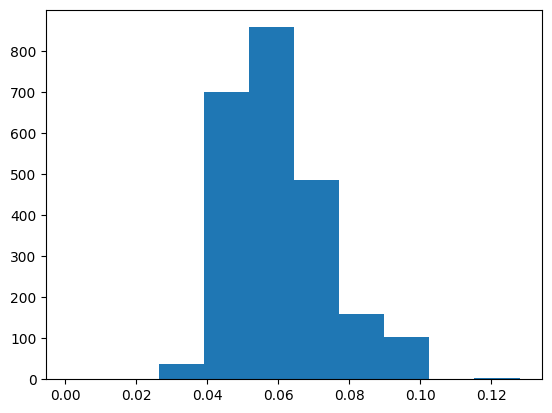

In [158]:
plt.hist(df_beer.abv)

In [159]:
# !pip install scipy

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [160]:
df_beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [161]:
df_beer['style'].unique()

array(['American Pale Lager', 'American Pale Ale (APA)', 'American IPA',
       'American Double / Imperial IPA', 'Oatmeal Stout',
       'American Porter', 'Saison / Farmhouse Ale', 'Belgian IPA',
       'Cider', 'Baltic Porter', 'Tripel', 'American Barleywine',
       'Winter Warmer', 'American Stout', 'Fruit / Vegetable Beer',
       'English Strong Ale', 'American Black Ale', 'Belgian Dark Ale',
       'American Blonde Ale', 'American Amber / Red Ale',
       'Berliner Weissbier', 'American Brown Ale',
       'American Pale Wheat Ale', 'Belgian Strong Dark Ale', 'Kölsch',
       'English Pale Ale', 'American Amber / Red Lager',
       'English Barleywine', 'Milk / Sweet Stout', 'German Pilsener',
       'Pumpkin Ale', 'Belgian Pale Ale', 'American Pilsner',
       'American Wild Ale', 'English Brown Ale', 'Altbier',
       'California Common / Steam Beer', 'Gose', 'Cream Ale',
       'Vienna Lager', 'Witbier', 'American Double / Imperial Stout',
       'Munich Helles Lager', 'Schwa

In [162]:
# Estilos con más alcohol de media:
abv_per_style = df_beer.groupby('style')['abv'].mean().sort_values(ascending = False)
abv_per_style

style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
                            ...   
Berliner Weissbier        0.043909
English Dark Mild Ale     0.041500
Light Lager               0.040417
Radler                    0.040333
Low Alcohol Beer          0.001000
Name: abv, Length: 99, dtype: float64

In [163]:
# Estilos con más ibu de media:
ibu_per_style = df_beer.groupby('style')['ibu'].mean().sort_values(ascending = False)
ibu_per_style

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
                                      ...  
Kristalweizen                           NaN
Low Alcohol Beer                        NaN
Mead                                    NaN
Rauchbier                               NaN
Shandy                                  NaN
Name: ibu, Length: 99, dtype: float64

In [166]:
# Eliminando los nan quedaría:
df_beers2 = df_beer.dropna(subset = ['ibu'])
df_beers2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 14 to 2408
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         1405 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          1405 non-null   int64  
 3   name        1405 non-null   object 
 4   style       1403 non-null   object 
 5   brewery_id  1405 non-null   int64  
 6   ounces      1405 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 87.8+ KB


In [168]:
df_beers2.groupby('style')['ibu'].mean().sort_values(ascending = False)

style
American Barleywine                   96.000000
American Double / Imperial IPA        93.320000
Russian Imperial Stout                86.500000
American Double / Imperial Pilsner    85.000000
Belgian Strong Dark Ale               72.000000
                                        ...    
Fruit / Vegetable Beer                14.200000
Light Lager                           11.666667
American Adjunct Lager                11.000000
Gose                                   9.428571
Berliner Weissbier                     7.800000
Name: ibu, Length: 90, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

## Ejercicio 18
Junta los dos datasets que tienes

## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [32]:
# todas las cervezas, que venda una cervecería, donde al menos una de ellas sea de 0.07 para arriba

## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [33]:
# Las cervezas que se encuentran en aquellos estados, cuya media de amargor, sea superior a la media de amargor total